# Imports necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Read datasets

In [3]:
titanic = pd.read_excel('../data/dataset/titanic3.xls')

In [4]:
hypothyroid = pd.read_csv('../data/dataset/dataset_57_hypothyroid.csv')

# Take a look at the data

## Titanic

In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [7]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [8]:
titanic.fare.fillna(titanic.age.mean(), inplace=True)

In [9]:
titanic = titanic[~titanic.embarked.isnull()]

In [10]:
titanic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1307 non-null int64
survived     1307 non-null int64
name         1307 non-null object
sex          1307 non-null object
age          1307 non-null float64
sibsp        1307 non-null int64
parch        1307 non-null int64
ticket       1307 non-null object
fare         1307 non-null float64
cabin        293 non-null object
embarked     1307 non-null object
boat         484 non-null object
body         121 non-null float64
home.dest    744 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 153.2+ KB


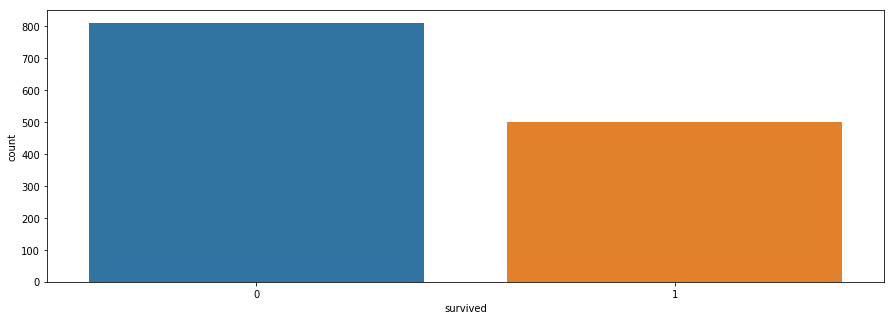

In [11]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', data=titanic)

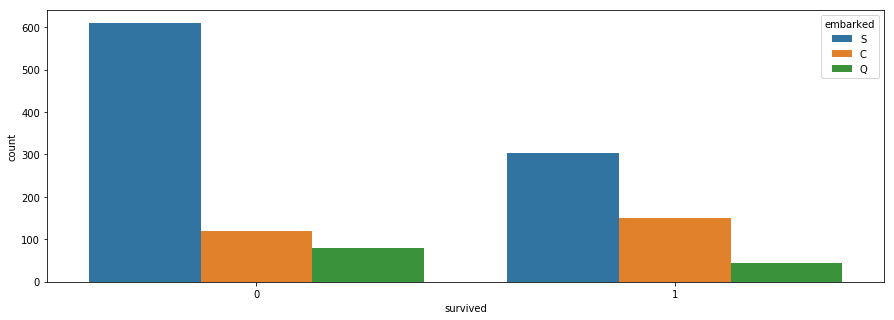

In [12]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', hue='embarked', data=titanic)

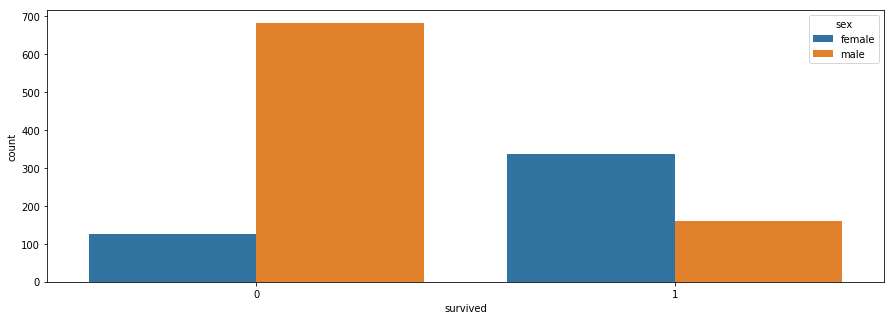

In [13]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', hue='sex', data=titanic)

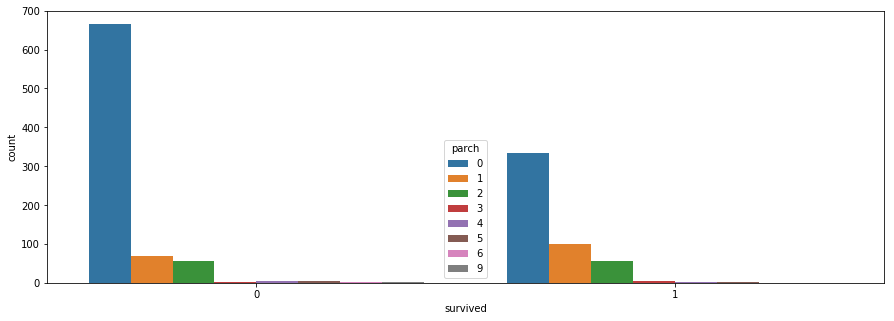

In [14]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', hue='parch', data=titanic)

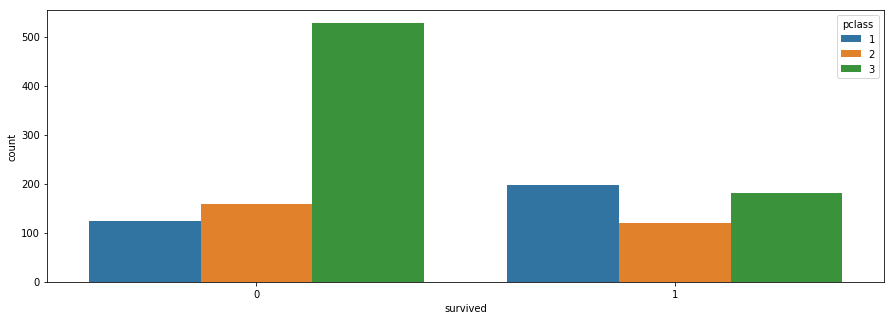

In [15]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', hue='pclass', data=titanic)

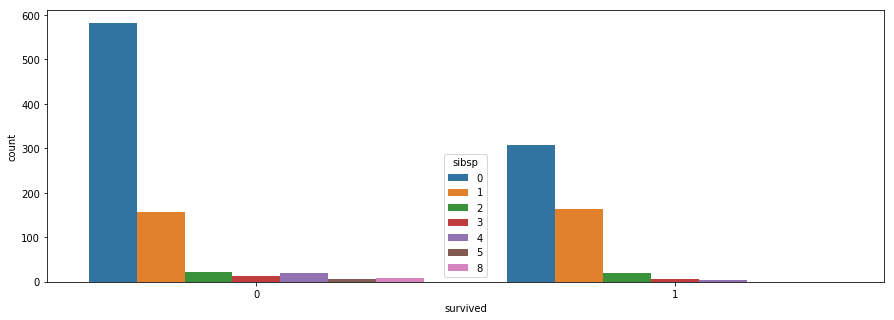

In [16]:
plt.figure(figsize=[15, 5])
sns.countplot(x='survived', hue='sibsp', data=titanic)

In [ ]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

In [ ]:
X = titanic[features]

In [ ]:
Y = titanic.survived

## Hypothyroid

In [ ]:
hypothyroid.head().T

In [ ]:
hypothyroid.info(verbose=True, null_counts=True)

# Data transformations

## Titanic

In [ ]:
titanic.sex.replace({'male': 0, 'female': 1}, inplace=True)

In [ ]:
titanic.embarked.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)